# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [79]:
import re
import csv
import numpy as np
import pandas as pd
from openpyxl import load_workbook

def data_parser():
    wb = load_workbook("Combined CPI.xlsx")
    sheets = wb.sheetnames
    sheet = wb[sheets[0]]
    skip_list = [48, 49, 130, 145, 226, 358, 359, 360]
    rows = [re.search(r"([a-zA-Z ',]*)", category.value).group() for categories in sheet["B8:B404"] for category in categories if category.row not in skip_list]
    columns = ["Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "AA", "AB"]
    cpi = {"Jan 2019": None, "Feb 2019": None, "Mar 2019": None, "Apr 2019": None, "May 2019": None, "Jun 2019": None, "Jul 2019": None, "Aug 2019": None, "Sep 2019": None, "Oct 2019": None, "Nov 2019": None, "Dec 2019": None}
    temp = 0
    for each in cpi.keys():
        cpi[each] = [(value.value if value.value != None else np.nan) for values in sheet[f"{columns[temp]}8:{columns[temp]}404"] for value in values if value.row not in skip_list]
        temp += 1
    cpi_u_2019 = pd.DataFrame(data = cpi, index = rows)
    cpi_u_2019 = cpi_u_2019.dropna()

    columns = ["SH", "SI", "SJ", "SK", "SL", "SM", "SN", "SO", "SP", "SQ", "SR", "SS"]
    cpi = {"Jan 2020": None, "Feb 2020": None, "Mar 2020": None, "Apr 2020": None, "May 2020": None, "Jun 2020": None, "Jul 2020": None, "Aug 2020": None, "Sep 2020": None, "Oct 2020": None, "Nov 2020": None, "Dec 2020": None}
    temp = 0
    for each in cpi.keys():
        cpi[each] = [(value.value if value.value != None else np.nan) for values in sheet[f"{columns[temp]}8:{columns[temp]}404"] for value in values if value.row not in skip_list]
        temp += 1
    cpi_u_2020 = pd.DataFrame(data = cpi, index = rows)
    cpi_u_2020 = cpi_u_2020.dropna()

    sheet = wb[sheets[2]]
    skip_list = [128, 143, 347, 348, 349]
    rows = [re.search(r"([a-zA-Z ',]*)", category.value).group() for categories in sheet["MP8:MP393"] for category in categories if category.row not in skip_list]
    columns = ["NI", "NJ", "NK", "NL", "NM", "NN", "NO", "NP", "NQ", "SQ", "SR", "SS"]
    cpi = {"Jan 2021": None, "Feb 2021": None, "Mar 2021": None, "Apr 2021": None, "May 2021": None, "Jun 2021": None, "Jul 2021": None, "Aug 2021": None, "Sep 2021": None, "Oct 2021": None, "Nov 2021": None, "Dec 2021": None}
    temp = 0
    for each in ['Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021']:
        cpi[each] = [(value.value if value.value != None else np.nan) for values in sheet[f"{columns[temp]}8:{columns[temp]}393"] for value in values if value.row not in skip_list]
        temp += 1
    for each in ['Oct 2021', 'Nov 2021', 'Dec 2021']:
        cpi[each] = [(value.value if value.value != None else np.nan) for values in sheet[f"{columns[temp]}8:{columns[temp]}394"] for value in values if value.row not in skip_list if value.row != 239]
        temp += 1
    cpi_u_2021 = pd.DataFrame(data = cpi, index = rows)
    cpi_u_2021 = cpi_u_2021.dropna()
    
    # Added in Phase III
    cpi_u = cpi_u_2019.join(cpi_u_2020)
    cpi_u = cpi_u.join(cpi_u_2021).dropna()
    cpi_u.to_csv('CPI.csv')
    return cpi_u
    
############ Function Call ############
data_parser()

,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,...,Mar 2021,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021
All items,252.550,253.181,254.095,254.943,255.167,255.402,256.087,256.294,256.593,257.229,...,264.793,266.832,268.551,270.981,272.265,273.012,274.138,276.724,278.880,280.192
Food,256.099,257.041,257.610,257.469,258.086,258.337,258.356,258.463,258.930,259.454,...,271.632,272.658,273.866,275.993,277.985,279.084,281.668,284.225,286.245,287.670
Food at home,240.834,241.746,242.360,241.467,242.103,241.876,241.500,241.244,241.521,242.034,...,252.927,254.029,254.931,257.052,258.782,259.739,262.969,265.512,267.632,268.745
Cereals and bakery products,274.392,276.086,276.681,276.526,277.423,276.499,276.946,276.348,277.211,277.002,...,284.002,285.055,286.440,285.542,288.886,288.921,291.964,294.985,297.420,298.635
Cereals and cereal products,225.864,227.111,230.357,228.252,227.744,228.699,228.509,227.176,227.193,226.875,...,231.878,230.712,233.057,233.155,234.396,235.159,236.574,240.473,243.585,245.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New and used motor vehicles,99.702,99.292,99.212,99.437,99.105,99.480,99.651,99.738,99.928,99.541,...,103.029,107.795,112.157,118.471,119.145,118.773,119.078,121.251,123.411,125.672
Utilities and public transportation,217.191,217.268,217.752,217.722,217.336,216.777,216.995,217.327,217.897,219.360,...,222.906,225.941,228.076,228.888,229.440,228.880,228.943,231.755,232.711,233.226
Household furnishings and operations,123.184,123.254,123.295,122.993,123.087,123.910,124.357,124.235,124.538,124.352,...,128.044,129.169,130.884,130.704,130.719,132.368,133.728,134.862,135.954,137.458
Other goods and services,445.971,448.377,448.494,448.514,449.884,449.578,451.697,453.196,453.384,455.058,...,472.607,473.649,473.011,473.718,477.103,479.048,479.525,483.592,484.683,487.131


## Web Collection Requirement \#1


In [80]:
import json
import requests
import pandas as pd

def web_parser1():
    header = {'Content-type': 'application/json'}
    series = json.dumps({'seriesid': ['LNS14000000'], 'startyear': "2019", 'endyear': '2021'})
    response = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data = series, headers = header)
    response = json.loads(response.text)
    rows = ['Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021']
    columns = {'Unemployment rate': [float(dic['value']) for dic in reversed(response['Results']['series'][0]['data'])]}
    unemployment_rate = pd.DataFrame(data = columns, index = rows)
    
    series = json.dumps({'seriesid': ['LNS14027660'], 'startyear': "2019", 'endyear': '2021'})
    response = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data = series, headers = header)
    response = json.loads(response.text)
    columns = {'Unemployment rate for high school graduates': [float(dic['value']) for dic in reversed(response['Results']['series'][0]['data'])]}
    unemployment_rate_high_school = pd.DataFrame(data = columns, index = rows)
    
    series = json.dumps({'seriesid': ['LNS14027662'], 'startyear': "2019", 'endyear': '2021'})
    response = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data = series, headers = header)
    response = json.loads(response.text)
    columns = {'Unemployment rate for bachelor\'s and higher': [float(dic['value']) for dic in reversed(response['Results']['series'][0]['data'])]}
    unemployment_rate_college = pd.DataFrame(data = columns, index = rows)
    
    # Added in Phase III
    unemployment = unemployment_rate.join(unemployment_rate_high_school)
    unemployment = unemployment.join(unemployment_rate_college)
    unemployment.to_csv('U-rate.csv')
    return unemployment
    
############ Function Call ############
web_parser1()

,Unemployment rate,Unemployment rate for high school graduates,Unemployment rate for bachelor's and higher
Jan 2019,4.0,3.8,2.4
Feb 2019,3.8,3.8,2.2
Mar 2019,3.8,3.7,2.1
Apr 2019,3.6,3.4,2.1
May 2019,3.6,3.5,2.1
Jun 2019,3.6,3.8,2.1
Jul 2019,3.7,3.6,2.2
Aug 2019,3.7,3.5,2.0
Sep 2019,3.5,3.5,2.0
Oct 2019,3.6,3.7,2.1


## Web Collection Requirement #2

In [81]:
import csv
import requests
import pandas as pd
from bs4 import BeautifulSoup

def web_parser2():
    response = requests.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_cases")
    soup = BeautifulSoup(response.text, "html.parser")
    tags = soup.find_all('tr')
    trs = [tr for tr in tags if tr.find("a", {"title":"United States"})]
    tds = [td.text for td in trs]
    cases = [td.split()[4:] for td in tds]
    cases = [int(num.replace(",", "")) for case in cases for num in case]

    rows = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022']
    columns = {'Cumulative cases at the beginning of the month': cases}
    covid_cases = pd.DataFrame(data = columns, index = rows)
    covid_cases.to_csv('COVID-19 cases.csv')
    
    return covid_cases

############ Function Call ############
web_parser2()

,Cumulative cases at the beginning of the month
Jan 2020,0
Feb 2020,7
Mar 2020,62
Apr 2020,213199
May 2020,1035353
Jun 2020,1734040
Jul 2020,2573393
Aug 2020,4456389
Sep 2020,5936572
Oct 2020,7115491


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://www.bls.gov/cpi/tables/supplemental-files/home.htm
*   Web Collection #1 Source: https://www.bls.gov/developers/api_signature.htm
*   Web Collection #2 Source: https://en.wikipedia.org/wiki/COVID-19_pandemic_cases



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [91]:
import csv
import pandas as pd

def insight1():
    with open('COVID-19 cases.csv', 'r') as fin:
        cumulative_cases = pd.DataFrame(list(csv.reader(fin))[1:])[1].astype(int).values.tolist()
        new_cases = []
        for each in range(0, len(cumulative_cases) - 1):
            new_cases.append(cumulative_cases[each + 1] - cumulative_cases[each])
        months = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021']
        new_cases = pd.DataFrame({'New cases of the month': new_cases}, index = months)
        new_cases.to_csv('New COVID-19 cases.csv')
        
        return new_cases
    
############ Function Call ############
insight1()

,New cases of the month
Jan 2020,7
Feb 2020,55
Mar 2020,213137
Apr 2020,822154
May 2020,698687
Jun 2020,839353
Jul 2020,1882996
Aug 2020,1480183
Sep 2020,1178919
Oct 2020,1836595


### Insight 1 Explanation

<br>As we are focusing on the changes of the market throughout the pandemic, we decided to calculate the new cases that occured during the month, rather than analyzing the cumulative cases in other insights.

In [98]:
import csv

def insight2():
    with open('CPI.csv', 'r') as fin:
        reader = csv.reader(fin)
        cpi_u = list(reader)[1:]
        cpi_u_pc = []
        for each in cpi_u:
            temp = []
            temp.append(each[0])
            for i in range(1, len(each) - 1):
                temp.append((float(each[i + 1]) - float(each[i])) / float(each[i]) * 100)
            cpi_u_pc.append(temp)
        cpi_u_pc = pd.DataFrame(cpi_u_pc)
        for i in range(1, 36):
            cpi_u_pc[i] = round(cpi_u_pc[i], 3)
        months = ['Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021']
        cpi_u_pc.rename(columns = {old: new for old, new in zip([i for i in range(1, 36)], months[:-1])}, inplace = True)
        cpi_u_pc.set_index(0, inplace = True)
        cpi_u_pc.to_csv('CPI-pc.csv')
        
    with open('New COVID-19 cases.csv', 'r') as fin:
        reader = csv.reader(fin)
        covid_pc = list(reader)[1:]
        covid_pc = pd.DataFrame(data = covid_pc).set_index(0)[1].values.tolist()
        temp = []
        for each in range(0, len(covid_pc) - 1):
            temp.append( round((int(covid_pc[each + 1]) - int(covid_pc[each])) / int(covid_pc[each]) * 100, 2) )
        covid_pc = temp
        temp_dict = {'Months': months[12:-1], 'Percent change for COVID': temp}
        covid_pc = pd.DataFrame(data = temp_dict)
        covid_pc.to_csv('COVID-pc.csv')

    with open('U-rate.csv', 'r') as fin:
        reader = csv.reader(fin)
        temp_pc = list(reader)[1:]
        temp_pc = pd.DataFrame(temp_pc)
        temp = []
        for each in range(12, len(temp_pc[1]) - 1):
            temp.append(round((float(temp_pc[1][each + 1]) - float(temp_pc[1][each])) / float(temp_pc[1][each]), 2))
        unemployment_pc = pd.DataFrame(data = temp_pc[0][12:-1])
        unemployment_pc.loc[:, 1] = temp
        unemployment_pc.rename(columns = {0: 'Months', 1: 'Percent change for unemployment'}, inplace = True)
        unemployment_pc.to_csv('U-pc.csv')
        temp = []
        for each in range(12, len(temp_pc[2]) - 1):
            temp.append(round((float(temp_pc[2][each + 1]) - float(temp_pc[2][each])) / float(temp_pc[2][each]), 2))
        unemployment_high_school_pc = pd.DataFrame(data = temp_pc[0][12:-1])
        unemployment_high_school_pc.loc[:, 1] = temp
        unemployment_high_school_pc.rename(columns = {0: 'Months', 1: 'Percent change for unemployment of high school graduates'}, inplace = True)
        unemployment_high_school_pc.to_csv('U-highschool-pc.csv')
        temp = []
        for each in range(12, len(temp_pc[3]) - 1):
            temp.append(round((float(temp_pc[3][each + 1]) - float(temp_pc[3][each])) / float(temp_pc[3][each]), 2))
        unemployment_college_pc = pd.DataFrame(data = temp_pc[0][12:-1])
        unemployment_college_pc.loc[:, 1] = temp
        unemployment_college_pc.rename(columns = {0: 'Months', 1: 'Percent change for unemployment of college graduates'}, inplace = True)
        unemployment_college_pc.to_csv('U-college-pc.csv')
        
    print(cpi_u_pc)
    print()
    print(covid_pc)
    print()
    print(unemployment_pc)
    print()
    print(unemployment_high_school_pc)
    print()
    print(unemployment_college_pc)
    
############ Function Call ############
insight2()

                                      Jan 2019  Feb 2019  Mar 2019  Apr 2019  \
0                                                                              
All items                                0.250     0.361     0.334     0.088   
Food                                     0.368     0.221    -0.055     0.240   
Food at home                             0.379     0.254    -0.368     0.263   
Cereals and bakery products              0.617     0.216    -0.056     0.324   
Cereals and cereal products              0.552     1.429    -0.914    -0.223   
...                                        ...       ...       ...       ...   
New and used motor vehicles             -0.411    -0.081     0.227    -0.334   
Utilities and public transportation      0.035     0.223    -0.014    -0.177   
Household furnishings and operations     0.057     0.033    -0.245     0.076   
Other goods and services                 0.539     0.026     0.004     0.305   
Personal care                           

### Insight 2 Explanation

<br>We calculated the inflation rate for CPI for each month. Because we are focusing on the rapid changes in the market, we also calculated the percent changes of new COVID-19 cases and unemployment rates.
<br>Visual 1 graphs the percent changes of unemployment rates and new COVID-19 cases.

In [95]:
import csv
import pandas as pd

def insight3():
    with open ('CPI-pc.csv', 'r') as fin:
        reader = csv.reader(fin)
        cpi_pc_max = pd.DataFrame(list(reader))
        months = ['Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021']
        cpi_pc_max['Max'] = cpi_pc_max.iloc[1:, 1:].max(axis = 1)
        cpi_pc_max['Min'] = cpi_pc_max.iloc[1:, 1:-1].min(axis = 1)
        cpi_pc_max['Difference'] = abs(cpi_pc_max['Max'] - cpi_pc_max['Min'])
        drop = [124, 123, 122, 119, 126, 125, 324]
        for each in drop:
            cpi_pc_max.drop([each], axis = 0, inplace = True)
        cpi_pc_max = cpi_pc_max.sort_values('Difference', ascending = False, inplace = False).iloc[:10, :]
        for each in range(1, 36):
            cpi_pc_max.drop([each], axis = 1, inplace = True)
        cpi_pc_max.to_csv('CPI-pc-max.csv')
            
        fin.seek(0)
        reader = csv.reader(fin)
        cpi_pc_min = pd.DataFrame(list(reader))
        cpi_pc_min['Max'] = cpi_pc_min.iloc[1:, 1:].max(axis = 1)
        cpi_pc_min['Min'] = cpi_pc_min.iloc[1:, 1:-1].min(axis = 1)
        cpi_pc_min['Difference'] = abs(cpi_pc_min['Max'] - cpi_pc_min['Min'])
        drop = [248, 253, 252, 250, 357, 246, 336, 245, 256]
        for each in drop:
            cpi_pc_min.drop([each], axis = 0, inplace = True)
        cpi_pc_min = cpi_pc_min.sort_values('Difference', ascending = True, inplace = False).iloc[:10, :]
        for each in range(1, 36):
            cpi_pc_min.drop([each], axis = 1, inplace = True)
        cpi_pc_min.to_csv('CPI-pc-min.csv')
            
    print(cpi_pc_max)
    print()
    print(cpi_pc_min)
    
############ Function Call ############
insight3()

                                                     0    Max    Min  \
120                                           Fuel oil  9.959 -0.297   
278                            Motor vehicle insurance  9.346 -0.049   
36                                          Pork chops  8.370 -0.672   
251  Other lodging away from home including hotels ...  8.784 -0.172   
287                           Intracity transportation  8.844 -0.100   
118                                 Energy commodities  8.873 -0.065   
65                       Oranges, including tangerines  8.889 -0.027   
29                        Uncooked other beef and veal  8.650 -0.066   
69                                             Lettuce  8.254 -0.221   
273                               Car and truck rental  7.437 -0.922   

     Difference  
120      10.256  
278       9.395  
36        9.042  
251       8.956  
287       8.944  
118       8.938  
65        8.916  
29        8.716  
69        8.475  
273       8.359  

        

### Insight 3 Explanation

<br>Goes together with Visual 2.
<br>There are total of 364 categories of CPI collected in the downloaded dataset. We have determined that it would take too much time to individually analyze all categories, so we have sorted out the ten categories with the highest and lowest difference between the minimum and maximum inflation rate. 
<br>We had to skip over some industries, because if we didn't the top ten list would be populated by the same industry. For example, six out of ten industry with the highest difference would be in the fuel industryif we didn't exclude them beforehand.

In [93]:
import csv
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.metrics import r2_score

def insight4():
    with open('CPI-pc-max.csv', 'r') as fin:
        cpi_max = pd.DataFrame(list(csv.reader(fin))[1:]).iloc[:, 1].values.tolist()
    with open('CPI-pc-min.csv', 'r') as fin:
        cpi_min = pd.DataFrame(list(csv.reader(fin))[1:]).iloc[:, 1].values.tolist()
        
    with open('CPI-pc.csv', 'r') as fin:
        cpi = pd.DataFrame(list(csv.reader(fin))[1:])    
        cpi_pc_max = []
        cpi_pc_min = []
        for each in [cpi_pc_max, cpi_pc_min]:
            for one in range(0, 368):
                temp = []
                if cpi[0][one] in cpi_max:
                    temp.append(cpi[0][one])
                    temp.append(cpi.iloc[one, 1:].values.tolist())
                    each.append(temp)
            
    with open('COVID-pc.csv', 'r') as fin:
        covid = pd.DataFrame(list(csv.reader(fin))[1:])
        covid = covid.drop([0, 1], axis = 1, inplace = False)[2].values.tolist()
        covid = np.array(covid).astype(float).reshape(-1, 1)
        
    max_r2 = []
    for each in range(0, len(cpi_pc_max)):
        temp = []
        temp.append(cpi_pc_max[each][0])
        temp.append(round(r2_score(covid, np.array(cpi_pc_max[each][1][12:]).astype(float)), 2))
        max_r2.append(temp)
    min_r2 = []
    for each in range(0, len(cpi_pc_min)):
        temp = []
        temp.append(cpi_pc_min[each][0])
        temp.append(round(r2_score(covid, np.array(cpi_pc_min[each][1][12:]).astype(float)), 2))
        min_r2.append(temp)

    print('Ten industries with highest difference and the r^2 value on percent change of new COVID-19 cases vs. inflation')
    pprint(max_r2)
    print()
    print('Ten industries with lowest difference and the r^2 value on percent change of new COVID-19 cases vs. inflation')
    pprint(min_r2)
            
############ Function Call ############
insight4()

Ten industries with highest difference and the r^2 value on percent change of new COVID-19 cases vs. inflation
[['Uncooked other beef and veal', -0.05],
 ['Pork chops', -0.05],
 ['Oranges, including tangerines', -0.05],
 ['Lettuce', -0.05],
 ['Energy commodities', -0.05],
 ['Fuel oil', -0.05],
 ['Other lodging away from home including hotels and motels', -0.05],
 ['Car and truck rental', -0.05],
 ['Motor vehicle insurance', -0.05],
 ['Intracity transportation', -0.05]]

Ten industries with lowest difference and the r^2 value on percent change of new COVID-19 cases vs. inflation
[['Uncooked other beef and veal', -0.05],
 ['Pork chops', -0.05],
 ['Oranges, including tangerines', -0.05],
 ['Lettuce', -0.05],
 ['Energy commodities', -0.05],
 ['Fuel oil', -0.05],
 ['Other lodging away from home including hotels and motels', -0.05],
 ['Car and truck rental', -0.05],
 ['Motor vehicle insurance', -0.05],
 ['Intracity transportation', -0.05]]


### Insight 4 Explanation

<br>We wanted to see if the inflation rates for each industry correlates with the percent changes of new COVID-19 cases. We did statistical analysis using r^2 values.
<br>This analysis shows that there were virtually no direct correlation between inflation and new COVID-19 cases.

In [87]:
import csv
import pandas as pd

def insight5():
    with open('CPI-pc.csv', 'r') as fin:
        cpi_pc_mean = pd.DataFrame(list(csv.reader(fin))[1:])
        
        for each in cpi_pc_mean.columns[1:]:
            cpi_pc_mean[each] = cpi_pc_mean[each].astype(float)
            
        cpi_pc_mean.drop([0], axis = 1, inplace = True)
        cpi_pc_mean.loc['Average'] = cpi_pc_mean.mean()
        
        for each in range(0, 368):
            cpi_pc_mean.drop(each, axis = 0, inplace = True)
            
        months = ['Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021']
        cpi_pc_mean.loc['Months'] = months[:-1]
        cpi_pc_mean.to_csv('Average CPI-pc.csv')
        
        return cpi_pc_mean

############ Function Call ############
insight5()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
Average,0.195144,0.281614,-0.013402,0.104946,0.007647,0.130443,-0.060962,-0.02612,0.143899,0.140307,...,0.556454,0.71478,0.627652,0.685595,0.525549,0.382364,0.476457,0.870823,0.716524,0.44978
Months,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,...,Feb 2021,Mar 2021,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021


### Insight 5 Explanation

<br>Goes together with Visual 3.
<br>Each average is the inflation rate for each month. This table shows how the entire market, in average, changed during the month.

## Data Visualizations

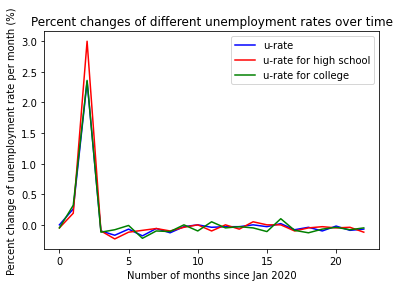

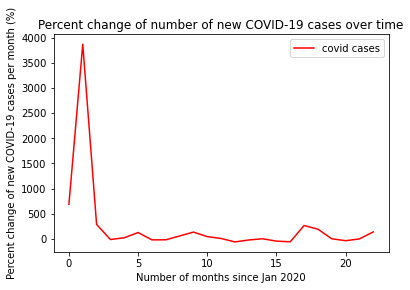

In [155]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

def visual1():
    with open('COVID-pc.csv', 'r') as fin:
        reader = csv.reader(fin)
        reader = list(reader)[1:]
        for each in reader:
            each.pop(0)
        covid = pd.DataFrame(reader)[1].values.tolist()
        covid[1] = float(covid[1]) / 100
    
    with open('U-pc.csv', 'r') as fin:
        reader = csv.reader(fin)
        reader = list(reader)[1:]
        for each in reader:
            each.pop(0)
        u_rate = pd.DataFrame(reader)[1].values.tolist()
        
    with open('U-highschool-pc.csv', 'r') as fin:
        reader = csv.reader(fin)
        reader = list(reader)[1:]
        for each in reader:
            each.pop(0)
        u_rate_high = pd.DataFrame(reader)[1].values.tolist()
        
    with open('U-college-pc.csv', 'r') as fin:
        reader = csv.reader(fin)
        reader = list(reader)[1:]
        for each in reader:
            each.pop(0)
        u_rate_college = pd.DataFrame(reader)[1].values.tolist()
        
    ax1 = plt.gca()
    graph1 = pd.DataFrame({'tick': range(0, 23), 'u-rate': u_rate, 'u-rate for high school': u_rate_high, 'u-rate for college': u_rate_college})
    graph2 = pd.DataFrame({'tick': range(0, 23), 'covid cases': covid})
    graph1['u-rate'] = graph1['u-rate'].astype(float)
    graph1['u-rate for high school'] = graph1['u-rate for high school'].astype(float)
    graph1['u-rate for college'] = graph1['u-rate for college'].astype(float)
    graph1.plot(kind = 'line', x = 'tick', y = 'u-rate', color = 'blue', ax = ax1, title = 'Percent changes of different unemployment rates over time')
    graph1.plot(kind = 'line', x = 'tick', y = 'u-rate for high school', color = 'red', ax = ax1, ylabel = 'Percent change of unemployment rate per month (%)')
    graph1.plot(kind = 'line', x = 'tick', y = 'u-rate for college', color = 'green', ax = ax1, xlabel = 'Number of months since Jan 2020')
    graph2['covid cases'] = graph2['covid cases'].astype(float)
    graph2.plot(kind = 'line', x = 'tick', y = 'covid cases', color = 'red', xlabel = 'Number of months since Jan 2020', ylabel = 'Percent change of new COVID-19 cases per month (%)', title = 'Percent change of number of new COVID-19 cases over time')

############ Function Call ############
visual1()

### Visualization 1 Explanation

<br>Goes together with insight 3.
<br>We are trying to prove the correlation between unemployment rates and numbers of new COVID-19 cases. Because the percent change of number of new COVID-19 cases for Feb 2020 was abnormally high, we divided the number by 100 for the plot to show a more accurate representation of the overall trend.
<br>Looking at the graphs, the two plot shows that COVID-19 cases and unemployment rate are indeed positively correlated. The plot even shows the correlation during June 2021 ~ July 2021 when COVID-19 cases had another sharp increase. 

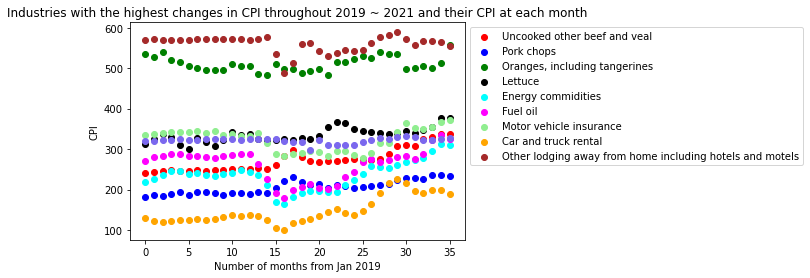

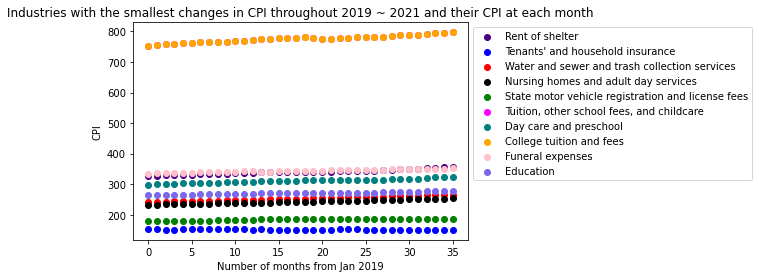

In [89]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

def visual2():
    with open('CPI-pc-max.csv', 'r') as fin:
        reader = list(csv.reader(fin))[1:]
        cpi_pc_max = []
        for each in reader:
            cpi_pc_max.append(each[1])
            
    with open('CPI-pc-min.csv', 'r') as fin:
        reader = list(csv.reader(fin))[1:]
        cpi_pc_min = []
        for each in reader:
            cpi_pc_min.append(each[1])
    
    with open('CPI.csv', 'r') as fin:
        reader = list(csv.reader(fin))[1:]
        temp = {}
        for cpi in reader:
            if cpi[0] in cpi_pc_max:
                temp[cpi[0]] = cpi[1:]
                
        temp = pd.DataFrame(temp)
        
        for each in range(0, 10):
            temp.iloc[:, each] = temp.iloc[:, each].astype(float)
            
        temp2 = {}
        for cpi in reader:
            if cpi[0] in cpi_pc_min:
                temp2[cpi[0]] = cpi[1:]
                
        temp2 = pd.DataFrame(temp2)
        
        for each in range(0, 10):
            temp2.iloc[:, each] = temp2.iloc[:, each].astype(float)
        
        graph1 = pd.DataFrame({'tick': range(0, 36), 'Pork chops': temp['Pork chops'],
                               'Lettuce': temp["Lettuce"],
                               'Uncooked other beef and veal': temp['Uncooked other beef and veal'],
                               'Oranges, including tangerines': temp['Oranges, including tangerines'],
                               'Energy commodities': temp['Energy commodities'],
                               'Fuel oil': temp['Fuel oil'],
                               'Motor vehicle insurance': temp['Motor vehicle insurance'],
                               'Intracity transportation': temp['Intracity transportation'],
                               'Car and truck rental': temp['Car and truck rental'],
                               'Other lodging away from home including hotels and motels': temp['Other lodging away from home including hotels and motels'],
                              })
        plt.scatter(graph1['tick'], graph1['Uncooked other beef and veal'], color = 'red')
        plt.scatter(graph1['tick'], graph1['Pork chops'], color = 'blue')
        plt.scatter(graph1['tick'], graph1['Oranges, including tangerines'], color = 'green')
        plt.scatter(graph1['tick'], graph1['Lettuce'], color = 'black')
        plt.scatter(graph1['tick'], graph1['Energy commodities'], color = 'cyan')
        plt.scatter(graph1['tick'], graph1['Fuel oil'], color = 'magenta')
        plt.scatter(graph1['tick'], graph1['Other lodging away from home including hotels and motels'], color = 'lightgreen')
        plt.scatter(graph1['tick'], graph1['Car and truck rental'], color = 'orange')
        plt.scatter(graph1['tick'], graph1['Motor vehicle insurance'], color = 'brown')
        plt.scatter(graph1['tick'], graph1['Intracity transportation'], color = 'mediumslateblue')
        plt.xlabel('Number of months from Jan 2019')
        plt.ylabel('CPI')        
        plt.legend(['Uncooked other beef and veal', 'Pork chops', 'Oranges, including tangerines',
                    'Lettuce', 'Energy commidities', 'Fuel oil',
                    'Motor vehicle insurance', 'Car and truck rental',
                    'Other lodging away from home including hotels and motels'],bbox_to_anchor = (1, 1))
        plt.title('Industries with the highest changes in CPI throughout 2019 ~ 2021 and their CPI at each month')
        plt.show()
        print()

        graph2 = pd.DataFrame({'tick': range(0, 36),
                               'Rent of shelter': temp2['Rent of shelter'],
                               'Tenants\' and household insurance': temp2['Tenants\' and household insurance'],
                               'Water and sewer and trash collection services': temp2['Water and sewer and trash collection services'],
                               'Nursing homes and adult day services': temp2['Nursing homes and adult day services'],
                               'State motor vehicle registration and license fees': temp2['State motor vehicle registration and license fees'],
                               'Tuition, other school fees, and childcare': temp2['Tuition, other school fees, and childcare'],
                               'Day care and preschool': temp2['Day care and preschool'],
                               'College tuition and fees': temp2['Tuition, other school fees, and childcare'],
                               'Funeral expenses': temp2['Funeral expenses'],
                               'Education': temp2['Education']})
        plt.scatter(graph2['tick'], graph2['Rent of shelter'], color = 'indigo')
        plt.scatter(graph2['tick'], graph2['Tenants\' and household insurance'], color = 'blue')
        plt.scatter(graph2['tick'], graph2['Water and sewer and trash collection services'], color = 'red')
        plt.scatter(graph2['tick'], graph2['Nursing homes and adult day services'], color = 'black')
        plt.scatter(graph2['tick'], graph2['State motor vehicle registration and license fees'], color = 'green')
        plt.scatter(graph2['tick'], graph2['Tuition, other school fees, and childcare'], color = 'magenta')
        plt.scatter(graph2['tick'], graph2['Day care and preschool'], color = 'teal')
        plt.scatter(graph2['tick'], graph2['College tuition and fees'], color = 'orange')
        plt.scatter(graph2['tick'], graph2['Funeral expenses'], color = 'pink')
        plt.scatter(graph2['tick'], graph2['Education'], color = 'mediumslateblue')
        plt.xlabel('Number of months from Jan 2019')
        plt.ylabel('CPI')
        plt.legend(['Rent of shelter', 'Tenants\' and household insurance', 'Water and sewer and trash collection services',
                    'Nursing homes and adult day services', 'State motor vehicle registration and license fees',
                    'Tuition, other school fees, and childcare', 'Day care and preschool',
                    'College tuition and fees', 'Funeral expenses', 'Education'], bbox_to_anchor = (1, 1))
        plt.title('Industries with the smallest changes in CPI throughout 2019 ~ 2021 and their CPI at each month')
        plt.show()
        
############ Function Call ############
visual2()

### Visualization 2 Explanation

<br>Goes togeter with Insight 2.
<br>We mapped the CPI of the 10 categories with most/least change throughout the 3 year span.
<br>We concluded that COVID-19 didn't have a direct effect on the price of products as the two graphs don't share the same trend. We also concluded that simialr industries experienced ups and downs together. For example, energy commodities and fuel oil experience increase and decrease at the same time period.

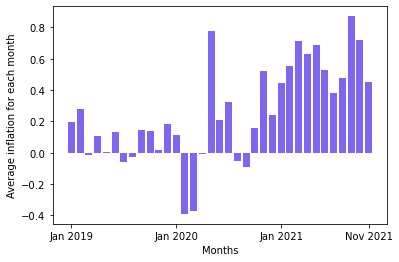

In [156]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

def visual3():
    with open('Average CPI-pc.csv', 'r') as fin:
        average = pd.DataFrame(list(csv.reader(fin)))
        average.drop(0, axis = 0, inplace = True)
        average.set_index(0, inplace = True)
        average.loc['Average'] = average.loc['Average'].astype(float)
        plt.bar(average.loc['Months'], average.loc['Average'], color = "mediumslateblue")
        plt.xlabel('Months')
        plt.xticks(['Jan 2019', 'Jan 2020', 'Jan 2021', 'Nov 2021'])
        plt.ylabel('Average inflation for each month')
        plt.show()
        
############ Function Call ############
visual3()

### Visualization 3 Explanation

<br>Each bar represents the average inflation of all categories during each month. This bar graph shows that the inflation rate was stable pre-pandemic and that the market experienced a deflation at the beginning of pandemic and a big inflation onwards.

## Summary Files

In [182]:
import csv
import numpy as np
import pandas as pd

def summary1():
    with open('Average CPI-pc.csv', 'r') as fin:
        reader = pd.DataFrame(list(csv.reader(fin))[1:])
        average = reader.iloc[0, 1:].astype(float).round(2).values.tolist()
        months = reader.iloc[1, 1:]
    
    with open('COVID-pc.csv', 'r') as fin:
        covid = pd.DataFrame(list(csv.reader(fin))[1:])
        covid.drop([0, 1], axis = 1, inplace = True)
        covid = covid[2].astype(float).round(2).values.tolist()
    
    with open('U-pc.csv', 'r') as fin:
        u_rate = pd.DataFrame(list(csv.reader(fin))[1:])
        u_rate = u_rate.drop([0], axis = 1, inplace = False)
        
    with open('U-highschool-pc.csv', 'r') as fin:
        u_high_rate = pd.DataFrame(list(csv.reader(fin))[1:])
        u_high_rate = u_high_rate.drop([0], axis = 1, inplace = False)
        
    with open('U-college-pc.csv', 'r') as fin:
        u_college_rate = pd.DataFrame(list(csv.reader(fin))[1:])
        u_college_rate = u_college_rate.drop([0], axis = 1, inplace = False)

    u_combined = u_rate.append(u_high_rate).append(u_college_rate)
    u_combined[2] = u_combined[2].astype(float)
    u_combined = u_combined.groupby(1).mean().round(2)[2].values.tolist()
        
    combine = pd.DataFrame({'Inflation': average[12:], '%∆ of COVID-19 cases': covid, 'Average U-rate': u_combined}, index = months[12:])
    combine.to_csv('combined.csv')
    
    return combine
    
############ Function Call ############
summary1()

,Inflation,%∆ of COVID-19 cases,Average U-rate
1,,,
Jan 2020,0.11,685.71,-0.11
Feb 2020,-0.39,387421.82,-0.05
Mar 2020,-0.37,285.74,-0.07
Apr 2020,-0.01,-15.02,-0.07
May 2020,0.78,20.13,-0.03
Jun 2020,0.21,124.34,0.26
Jul 2020,0.32,-21.39,-0.04
Aug 2020,-0.05,-20.35,-0.03
Sep 2020,-0.09,55.79,-0.03


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
<br>https://openpyxl.readthedocs.io/en/stable/usage.html
<br>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
*   Example Stack Overflow Assistance



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Linkr
<br>https://youtu.be/CVkgsj6FuYg


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
